ERSIP Lab Sessions    
Lab 3: Spatial-based processing  
25-09-2025

**Experimenting the effect of different kernels**

In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

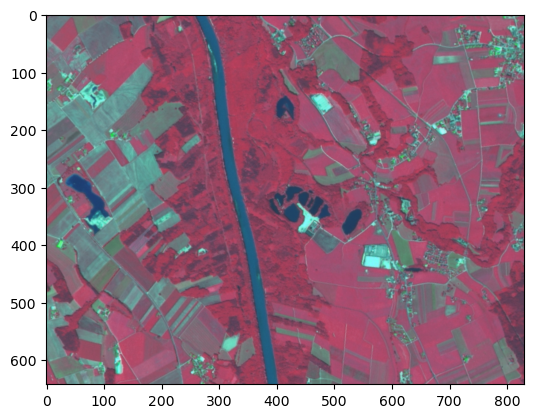

In [2]:
# load image
src = rasterio.open(r'Data\spot2005_pansharpened_utm33_subset_NIRRGMIR.tif')
img = src.read([1,2,3])  # read RGB bands 
rgb = np.transpose(img, (1, 2, 0))

# display image
from matplotlib import pyplot as plt
plt.imshow(rgb)
plt.show()

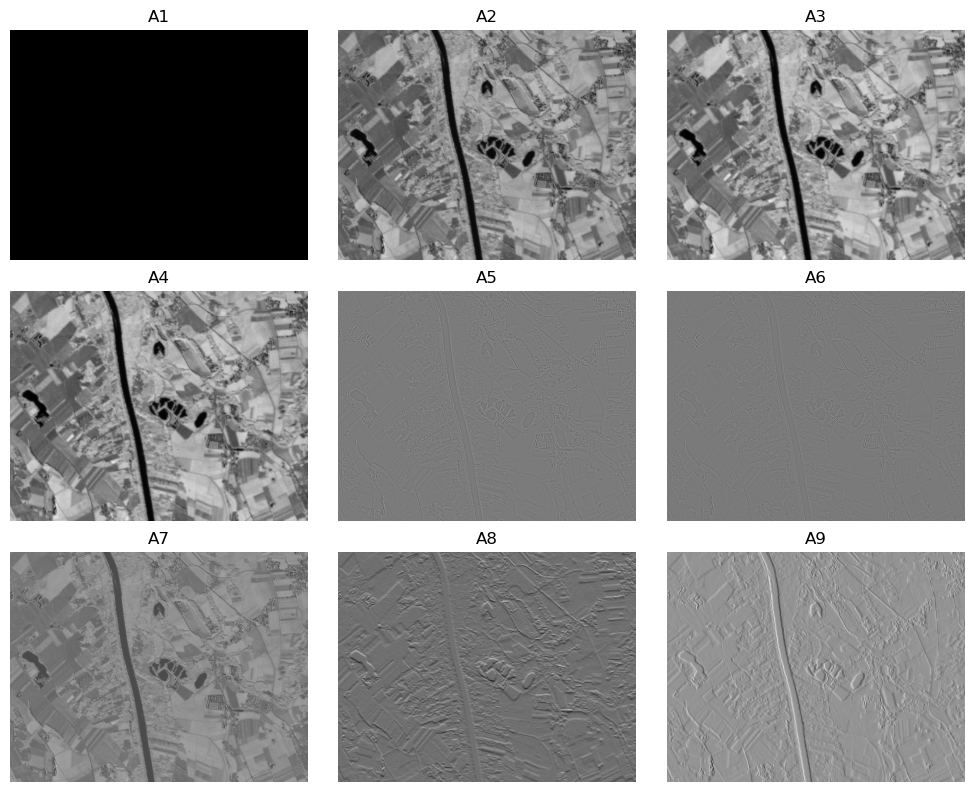

In [3]:
from scipy.signal import convolve2d

img = src.read(1)  # read first band

# define kernels
kernels = {
    "A1": np.zeros((3,3)),
    "A2": np.array([[0,0,0],[0,1,0],[0,0,0]]),
    "A3": np.ones((3,3))/9,
    "A4": np.array([[1,2,1],[2,4,2],[1,2,1]]),
    "A5": np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),
    "A6": np.array([[0,-1,0],[-1,4,-1],[0,-1,0]]),
    "A7": np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]),
    "A8": np.array([[-1,-1,-1],[0,0,0],[1,1,1]]),
    "A9": np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
}


#Filter images
filtered_images = {}
for name, kernel in kernels.items():
    filtered = convolve2d(img, kernel, mode='same', boundary='symm')
    filtered_images[name] = filtered

# Plot results
fig, axes = plt.subplots(3, 3, figsize=(10,8))
axes = axes.flatten()  # flatten for easy indexing

for i, name in enumerate(filtered_images):
    axes[i].imshow(filtered_images[name], cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**For a given spatial operator, compare the filtering effect and CPU time when increasing the kernel size.**

In [4]:
# mean filtering
# 3x3 vs 5x5 kernel
import time

kernel_3x3 = np.ones((3,3))/9
kernel_9x9 = np.ones((9,9))/81

start = time.process_time()
filtered_3x3 = convolve2d(img, kernel_3x3, mode='same', boundary='symm')
end = time.process_time()   
print(f"3x3 kernel time: {end - start} seconds")

start = time.process_time()
filtered_9x9 = convolve2d(img, kernel_9x9, mode='same', boundary='symm')
end = time.process_time()   
print(f"9x9 kernel time: {end - start} seconds")

3x3 kernel time: 0.015625 seconds
9x9 kernel time: 0.046875 seconds


**For a given spatial operator, compare the filtering effect and CPU time for a 2D separable kernel and its 1D alternatives.**

In [5]:
# 2D  kernel
kernel_2d = np.array([[1,2,1],
                      [2,4,2],
                      [1,2,1]]) / 16

# Separable 1D vectors
kernel_1d = np.array([1,2,1]) / 4

start = time.process_time()
filtered1 = convolve2d(img, kernel_2d, mode='same', boundary='symm')
end = time.process_time()   
print(f"2D kernel time: {end - start} seconds")

start = time.process_time()
tmp = convolve2d(img, kernel_1d[np.newaxis,:], mode='same', boundary='symm')   # horizontal
filtered_1d = convolve2d(tmp, kernel_1d[:,np.newaxis], mode='same', boundary='symm') # vertical
end = time.process_time()   
print(f"1D kernel time: {end - start} seconds")

2D kernel time: 0.046875 seconds
1D kernel time: 0.03125 seconds


**Compare the results of different smoothing operators.**

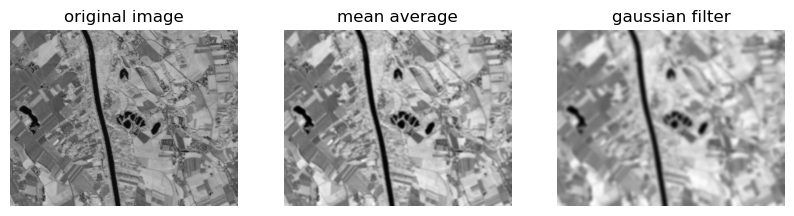

In [6]:
# box filter
kernel= np.ones((7,7))/49
box_filtered = convolve2d(img, kernel, mode='same', boundary='symm')

# gaussian filter
from scipy import ndimage as ndi
gaussian_filtered= ndi.gaussian_filter(img, sigma=5)

# display
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(img, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off")

axes[1].imshow(box_filtered,cmap='gray')
axes[1].set_title("mean average")
axes[1].axis("off")

axes[2].imshow(gaussian_filtered,cmap='gray')
axes[2].set_title("gaussian filter")
axes[2].axis("off")
plt.show()

**Compare the results of different sharpening operators.**

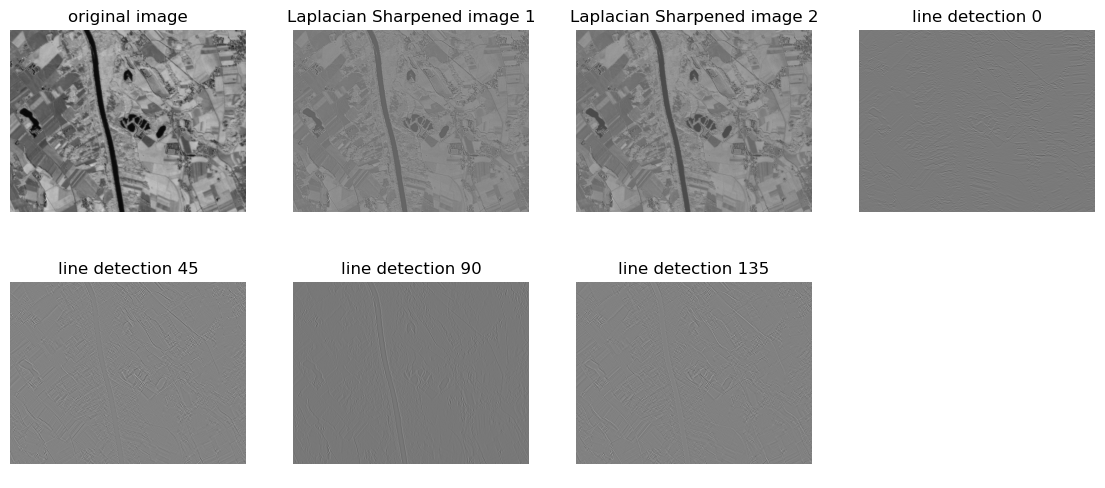

In [7]:
# laplacian filter
laplacian_kernel1 = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
laplacian_kernel2 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

img_sharp = convolve2d(img, laplacian_kernel1, mode='same', boundary='symm')
img_sharp2 = convolve2d(img, laplacian_kernel2, mode='same', boundary='symm')

# line detection
line_kernel1 = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
line_kernel2 = np.array([[2,-1,-1],[-1,2,-1],[-1,-1,2]])
line_kernel3 = np.array([[-1,2,-1],[-1,2,-1],[-1,2,-1]])
line_kernel4 = np.array([[-1,-1,2],[-1,2,-1],[2,-1,-1]])

img_line1 = convolve2d(img, line_kernel1, mode='same', boundary='symm')
img_line2 = convolve2d(img, line_kernel2, mode='same', boundary='symm')
img_line3 = convolve2d(img, line_kernel3, mode='same', boundary='symm')
img_line4 = convolve2d(img, line_kernel4, mode='same', boundary='symm')


# display
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
axes = axes.flatten()

axes[0].imshow(img, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off")

axes[1].imshow(img_sharp, cmap='gray')
axes[1].set_title("Laplacian Sharpened image 1")
axes[1].axis("off")   

axes[2].imshow(img_sharp2, cmap='gray')
axes[2].set_title("Laplacian Sharpened image 2")
axes[2].axis("off")

axes[3].imshow(img_line1, cmap='gray')
axes[3].set_title("line detection 0")
axes[3].axis("off")

axes[4].imshow(img_line2, cmap='gray')
axes[4].set_title("line detection 45")
axes[4].axis("off") 

axes[5].imshow(img_line3, cmap='gray')
axes[5].set_title("line detection 90")
axes[5].axis("off")

axes[6].imshow(img_line4, cmap='gray')
axes[6].set_title("line detection 135")
axes[6].axis("off")

axes[7].axis("off")

plt.show()


**Compare the results of different edge detection operators.**

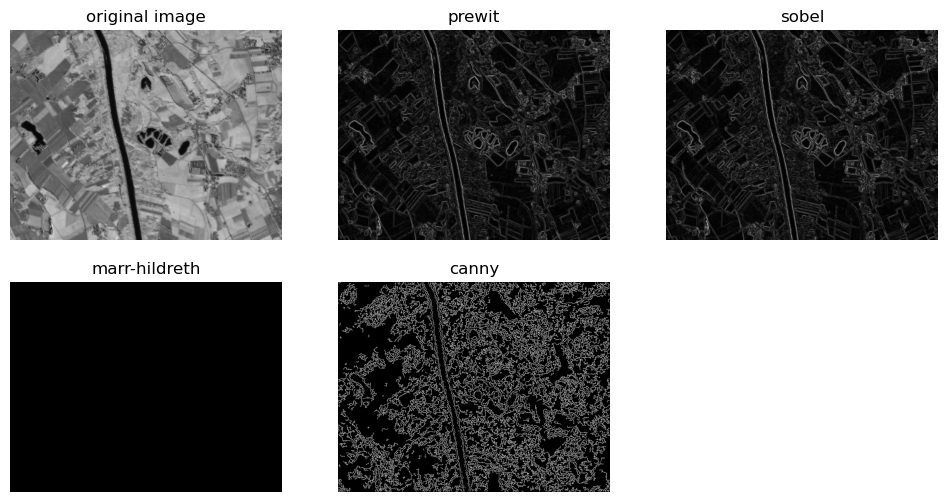

In [8]:
from skimage.util import random_noise
from skimage import feature
from scipy.ndimage import gaussian_laplace 

# prewit
prewit_kernel_x = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # vertical
prewit_kernel_y = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) # horizontal
prewit_x = convolve2d(img, prewit_kernel_x, mode='same', boundary='symm')
prewit_y = convolve2d(img, prewit_kernel_y, mode='same', boundary='symm')
# Gradient magnitude (combined edge strength)
prewit = np.sqrt(prewit_x**2 + prewit_y**2) 

# sobel
sobel_kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #vertical
sobel_kernel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) #horizontal
sobel_x = convolve2d(img, sobel_kernel_x, mode='same', boundary='symm')
sobel_y = convolve2d(img, sobel_kernel_y, mode='same', boundary='symm') 
# Gradient magnitude (combined edge strength)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)    

# Marr-Hildreth (Laplacian of Gaussian) 
LoG = gaussian_laplace(img, sigma=1)
threshold = 0.005 * np.max(np.abs(LoG))
# Efficient zero-crossing detection using np.roll
zerocross = (
    ((LoG * np.roll(LoG, 1, axis=0)) < 0) |
    ((LoG * np.roll(LoG, 1, axis=1)) < 0) |
    ((LoG * np.roll(LoG, (-1, -1), axis=(0, 1))) < 0) |
    ((LoG * np.roll(LoG, (-1, 1), axis=(0, 1))) < 0)
) & (
    (np.abs(LoG - np.roll(LoG, 1, axis=0)) > threshold) |
    (np.abs(LoG - np.roll(LoG, 1, axis=1)) > threshold)
)
# zerocross = zc.astype(np.uint8)

# canny edge detector
# using OpenCV
# Compute gradient magnitude using Sobel filters
# sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
# grad_mag = np.hypot(sobel_x, sobel_y)
# # Automatic thresholds
# high_thresh = 0.3 * grad_mag.max()  # strong edges
# low_thresh = 0.1 * grad_mag.max()   # weak edges
# # Apply Canny with automatic thresholds
# canny = cv2.Canny(img, threshold1=low_thresh, threshold2=high_thresh)

# using skimage
canny = ndi.gaussian_filter(img, 4)
canny = random_noise(canny, mode='speckle', mean=0.1)

# Compute the Canny filter 
canny_edges = feature.canny(canny)

# display
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.flatten()   
axes[0].imshow(img, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off") 

axes[1].imshow(prewit, cmap='gray')
axes[1].set_title("prewit")
axes[1].axis("off")

axes[2].imshow(sobel, cmap='gray')
axes[2].set_title("sobel")
axes[2].axis("off")

axes[3].imshow(zerocross, cmap='gray')
axes[3].set_title("marr-hildreth")
axes[3].axis("off")

axes[4].imshow(canny_edges, cmap='gray')
axes[4].set_title("canny")
axes[4].axis("off")
axes[5].axis("off")

plt.show()



**Are smoothing/sharpening operators invertible?**  
**Smoothing operators** (e.g., Gaussian blur, box filters) are non-invertible because they irreversibly destroy high-frequency information through low-pass filtering. The convolution kernels used in smoothing are rank-deficient (singular matrices), meaning they perform a many-to-one mapping where different input images can produce the same smoothed output. *Once detail is lost through averaging, it cannot be recovered.*  
**Sharpening operators** are also typically non-invertible in practice. While some sharpening filters may theoretically have inverses, they amplify noise and high frequencies, making any inverse operation unstable. Additionally, sharpening operations often involve non-linear components (like clipping values to valid ranges) that break invertibility.  
Mathematically, for an operator to be invertible, its kernel matrix must be non-singular (full rank) and the operation must be one-to-one. Smoothing operators fail this test because their kernels have determinant zero and map multiple inputs to the same output, proving non-invertibility.

**Compare the linear and nonlinear filtering operators.**

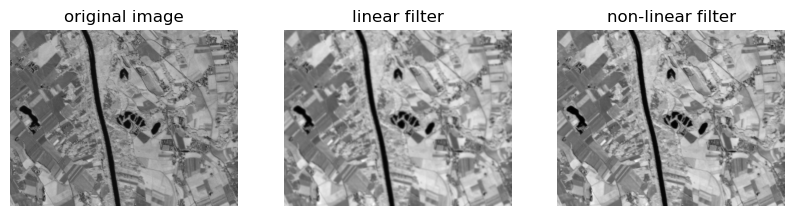

In [9]:
from scipy.ndimage import gaussian_filter, median_filter

linear = gaussian_filter(img, sigma=2)
non_linear = median_filter(img, size=4)

# display
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes = axes.flatten() 

axes[0].imshow(img, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off") 

axes[1].imshow(linear, cmap='gray')
axes[1].set_title("linear filter")
axes[1].axis("off")

axes[2].imshow(non_linear, cmap='gray')
axes[2].set_title("non-linear filter")
axes[2].axis("off")

plt.show()  

**Propose separable implementations of nonlinear operators.**

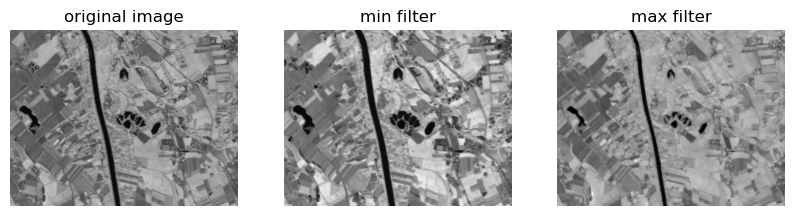

In [10]:
# min or max filter
from scipy.ndimage import minimum_filter, maximum_filter

min_filtered = minimum_filter(img, size=5)
max_filtered = maximum_filter(img, size=5)

# display
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
axes = axes.flatten() 

axes[0].imshow(img, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off") 

axes[1].imshow(min_filtered, cmap='gray')
axes[1].set_title("min filter")
axes[1].axis("off")

axes[2].imshow(max_filtered, cmap='gray')
axes[2].set_title("max filter")
axes[2].axis("off")

plt.show()

**Verify the ability of edge-preserving smoothing filters.**

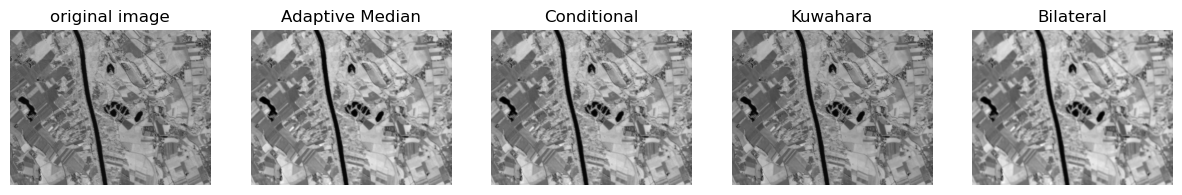

In [11]:
import cv2
from skimage.filters import rank
from skimage.morphology import disk

# Adaptive Median 
adaptive_median = cv2.medianBlur(img, 5)

# Conditional smoothing (smooth only non-edge pixels)
smooth = ndi.gaussian_filter(img, 2)
edges = feature.canny(smooth)

smoothed = cv2.GaussianBlur(img, (5,5), 0)
conditional = np.where(edges==0, smoothed, img)

# Kuwahara-like filter (approx using skimage rank mean_bilateral)
kuwahara = rank.mean_bilateral(img, disk(3), s0=10, s1=10)

# Bilateral filter
bilateral = cv2.bilateralFilter(img,9,75,75)

# Visualization
# display
fig, axes = plt.subplots(1, 5, figsize=(15, 10))
axes = axes.flatten() 

axes[0].imshow(img, cmap='gray')
axes[0].set_title("original image")
axes[0].axis("off") 

axes[1].imshow(adaptive_median, cmap='gray')
axes[1].set_title("Adaptive Median")
axes[1].axis("off")

axes[2].imshow(conditional, cmap='gray')
axes[2].set_title("Conditional")
axes[2].axis("off")

axes[3].imshow(kuwahara, cmap='gray')
axes[3].set_title("Kuwahara")
axes[3].axis("off")

axes[4].imshow(bilateral, cmap='gray')
axes[4].set_title("Bilateral")
axes[4].axis("off")

plt.show()
